In [1]:
import os
os.environ['HANLP_HOME'] = '/dlabscratch1/tdai/hanlp'
import hanlp
import chinese_converter
import random
import re
from tqdm import tqdm
import math
from collections import defaultdict
import hanlp.utils
import pandas as pd
from collections import Counter
from gensim.models import Word2Vec
import pandas as pd
from matplotlib import font_manager
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号
print("SimHei" in [f.name for f in font_manager.fontManager.ttflist])  

True


# adjective color analysis

In [2]:
# collect text
book_names = [f.encode('latin1').decode('utf-8') for f in os.listdir('./book')]
text_zhutianxin = ""
text_zhuxining = ""
for book in book_names:
    if "朱天心" in book:
        book = book.encode('utf-8').decode('latin1')
        with open(f'./book/{book}', 'r', encoding='utf-8') as f:
                text_ = f.read()
                text_ = chinese_converter.to_simplified(text_)
                text_zhutianxin += text_ + "\n"
    if "朱西甯" in book:
        book = book.encode('utf-8').decode('latin1')
        with open(f'./book/{book}', 'r', encoding='utf-8') as f:
                text_ = f.read()
                text_ = chinese_converter.to_simplified(text_)
                text_zhuxining += text_ + "\n"
text = text_zhutianxin + text_zhuxining

In [3]:
# clean the text
text_chunks_zhutianxin = text_zhutianxin.replace("\u3000", "").split("\n")
text_chunks_zhutianxin = [chunk for chunk in text_chunks_zhutianxin if chunk.strip()]
text_chunks_zhutianxin = [chunk for text_chunk in text_chunks_zhutianxin for chunk in hanlp.utils.rules.split_sentence(text_chunk)]
text_chunks_zhutianxin = [chunk for chunk in text_chunks_zhutianxin if re.search(r'[\u4e00-\u9fff]', chunk)]

text_chunks_zhuxining = text_zhuxining.replace("\u3000", "").split("\n")
text_chunks_zhuxining = [chunk for chunk in text_chunks_zhuxining if chunk.strip()]
text_chunks_zhuxining = [chunk for text_chunk in text_chunks_zhuxining for chunk in hanlp.utils.rules.split_sentence(text_chunk)]
text_chunks_zhuxining = [chunk for chunk in text_chunks_zhuxining if re.search(r'[\u4e00-\u9fff]', chunk)]

text_chunks = text_chunks_zhutianxin + text_chunks_zhuxining

In [ ]:
HanLP = hanlp.pipeline() \
    .append(hanlp.load('COARSE_ELECTRA_SMALL_ZH'), output_key='tok') \
    .append(hanlp.load('CTB9_POS_ELECTRA_SMALL'), output_key='pos') \
    .append(hanlp.load('MSRA_NER_ELECTRA_SMALL_ZH'), output_key='ner', input_key='tok') \
    .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')\
    .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\
    .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')

records_zhutianxin = []
records_zhuxining = []

for text_sample in tqdm(text_chunks_zhutianxin):
    # HanLP(text_sample).pretty_print()
    res = HanLP(text_sample)
    records_zhutianxin.append(res)

for text_sample in tqdm(text_chunks_zhuxining):
    # HanLP(text_sample).pretty_print()
    res = HanLP(text_sample)
    records_zhuxining.append(res)

all_records = records_zhutianxin + records_zhuxining

KeyboardInterrupt: 

In [21]:
HanLP = hanlp.pipeline() \
    .append(hanlp.load('COARSE_ELECTRA_SMALL_ZH'), output_key='tok') \
    .append(hanlp.load('CTB9_POS_ELECTRA_SMALL'), output_key='pos') \
    .append(hanlp.load('MSRA_NER_ELECTRA_SMALL_ZH'), output_key='ner', input_key='tok') \
    .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')\
    .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\
    .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')

records_zhutianxin = []
records_zhuxining = []

zhutianxin_sample = random.sample(text_chunks_zhutianxin, 1000)
zhuxining_sample = random.sample(text_chunks_zhuxining, 1000)
for text_sample in tqdm(zhutianxin_sample):
    # HanLP(text_sample).pretty_print()
    res = HanLP(text_sample)
    # print(res['tok'])
    if '她' in res['tok']:
        res.pretty_print()
    records_zhutianxin.append(res)

for text_sample in tqdm(zhuxining_sample):
    # HanLP(text_sample).pretty_print()
    res = HanLP(text_sample)
    # if '姐姐' or '弟弟' in res['tok']:
    #     res.pretty_print()
    records_zhuxining.append(res)

all_records = records_zhutianxin + records_zhuxining

  1%|          | 6/1000 [00:01<02:34,  6.44it/s]

  1%|▏         | 14/1000 [00:03<03:45,  4.37it/s]

  2%|▏         | 18/1000 [00:06<08:42,  1.88it/s]

  3%|▎         | 28/1000 [00:08<03:39,  4.42it/s]

  4%|▍         | 39/1000 [00:11<02:53,  5.55it/s]

  6%|▌         | 62/1000 [00:16<02:48,  5.55it/s]

  8%|▊         | 78/1000 [00:19<02:45,  5.58it/s]

 10%|▉         | 95/1000 [00:23<04:08,  3.64it/s]

 11%|█         | 106/1000 [00:26<03:43,  4.00it/s]

 13%|█▎        | 131/1000 [00:33<03:20,  4.34it/s]

 15%|█▌        | 150/1000 [00:37<02:34,  5.49it/s]

 16%|█▌        | 158/1000 [00:39<03:44,  3.75it/s]

 16%|█▌        | 161/1000 [00:40<03:14,  4.31it/s]

 16%|█▋        | 163/1000 [00:40<02:50,  4.90it/s]

 19%|█▊        | 186/1000 [00:45<03:20,  4.06it/s]

 20%|██        | 201/1000 [00:48<02:34,  5.19it/s]

 20%|██        | 205/1000 [00:49<02:34,  5.14it/s]

 21%|██▏       | 213/1000 [00:51<02:57,  4.43it/s]

 22%|██▏       | 217/1000 [00:52<03:30,  3.71it/s]

 22%|██▏       | 219/1000 [00:53<03:24,  3.82it/s]

 23%|██▎       | 230/1000 [00:56<03:32,  3.62it/s]

 24%|██▎       | 235/1000 [00:57<03:05,  4.12it/s]

 25%|██▌       | 254/1000 [01:04<03:40,  3.38it/s]

 27%|██▋       | 267/1000 [01:08<02:29,  4.91it/s]

 29%|██▉       | 290/1000 [01:14<02:55,  4.04it/s]

 35%|███▍      | 348/1000 [01:28<03:00,  3.61it/s]

 38%|███▊      | 377/1000 [01:36<02:19,  4.48it/s]

 38%|███▊      | 381/1000 [01:37<02:52,  3.60it/s]

 38%|███▊      | 383/1000 [01:38<02:39,  3.87it/s]


KeyboardInterrupt: 

In [ ]:
records

In [16]:
for record in records_zhutianxin[10:]:
    record.pretty_print()

In [5]:
all_records[4].pretty_print()

In [ ]:
# Count tokens with labels 'JJ' or 'VA' and aggregate counts
df_tokens = pd.DataFrame(
    [
        {'word': tok, 'count': 1, 'pos_tag': pos, 'author': 'Chu Tien-Hsin'}
        for record in records_zhutianxin
        for tok, pos in zip(record['tok'], record['pos'])
        if pos in ['VA']  # or ['JJ', 'VA']
    ] + 
    [
        {'word': tok, 'count': 1, 'pos_tag': pos, 'author': 'Chu Hsi-Ning'}
        for record in records_zhuxining
        for tok, pos in zip(record['tok'], record['pos'])
        if pos in ['VA']  # or ['JJ', 'VA']
    ])

# filter words with length >= 2
df_tokens_selected = df_tokens[df_tokens['word'].str.len() == 2]

In [7]:
len(df_tokens_selected.word.unique().tolist())

1378

In [8]:
word2vec = hanlp.load(hanlp.pretrained.word2vec.MERGE_SGNS_BIGRAM_CHAR_300_ZH)

Loading vocab and matrix from cache ...

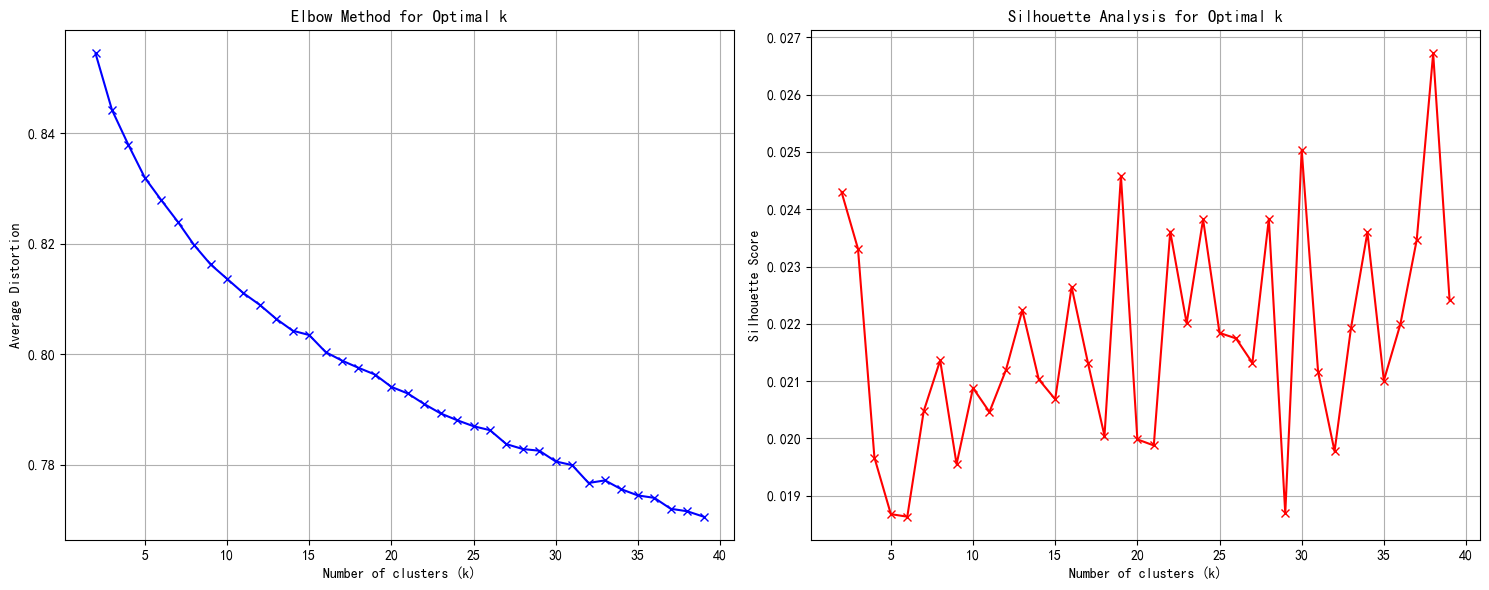


Cluster 1 top words:
1. 夺目
2. 耀眼
3. 灿烂
4. 璀璨
5. 明媚
6. 炫目
7. 眩目
8. 缤纷
9. 亮丽
10. 刺眼

Cluster 2 top words:
1. 着恼
2. 愣愣
3. 讷讷
4. 惊惶
5. 骇异
6. 冷冷
7. 喃喃
8. 慌慌
9. 惘然
10. 定定

Cluster 3 top words:
1. 忠厚
2. 和善
3. 坚毅
4. 豁达
5. 温柔
6. 腼腆
7. 倔强
8. 谦卑
9. 执拗
10. 聪明

Cluster 4 top words:
1. 愚蠢
2. 怯懦
3. 懦弱
4. 狡猾
5. 无耻
6. 阴险
7. 凶暴
8. 粗鲁
9. 可憎
10. 凶恶

Cluster 5 top words:
1. 淡绿
2. 雪白
3. 墨绿
4. 晶莹
5. 碧绿
6. 乌黑
7. 灰白
8. 翠绿
9. 乳白
10. 黑亮

Cluster 6 top words:
1. 没劲
2. 够瞧
3. 难受
4. 好笑
5. 不好
6. 好看
7. 舒服
8. 笨死
9. 难看
10. 差劲

Cluster 7 top words:
1. 乖乖
2. 轻易
3. 好好
4. 狠狠
5. 慢慢
6. 小心
7. 自觉
8. 甘心
9. 认真
10. 坚决

Cluster 8 top words:
1. 整洁
2. 宽敞
3. 干净
4. 舒适
5. 洁净
6. 清爽
7. 凉爽
8. 敞亮
9. 平整
10. 整齐

Cluster 9 top words:
1. 疲倦
2. 疲乏
3. 疲惫
4. 烦躁
5. 消沉
6. 虚弱
7. 恍惚
8. 憔悴
9. 困倦
10. 迟钝

Cluster 10 top words:
1. 乏味
2. 庸俗
3. 无趣
4. 粗俗
5. 艰涩
6. 浅薄
7. 难懂
8. 琐碎
9. 无聊
10. 冗长

Cluster 11 top words:
1. 恰当
2. 妥当
3. 正确
4. 准确
5. 合适
6. 合理
7. 确切
8. 周详
9. 可靠
10. 精妙

Cluster 12 top words:
1. 嫩嫩
2. 软软
3. 扑扑
4. 柔柔
5. 淅淅
6. 幽幽
7. 懒懒
8. 冰亮
9. 清清
10. 亮亮



/tmp/ipykernel_2743313/3769194863.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens_selected['cluster_id'] = df_tokens_selected['word'].map(word_to_cluster)
/tmp/ipykernel_2743313/3769194863.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens_selected['cluster_id'] = df_tokens_selected['cluster_id'].fillna(0).astype(int)


In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt

# Function to get word vectors for valid words
def get_valid_word_vectors(words, word2vec_model):
    word_vecs = []
    valid_words = []
    for word in words:
        try:
            vec = word2vec_model(word).cpu().numpy()
            if not np.all(vec == 0):
                word_vecs.append(vec)
                valid_words.append(word)
        except:
            pass
    return np.array(word_vecs), valid_words

# Get word vectors
word_vectors, valid_words = get_valid_word_vectors(df_tokens_selected['word'].unique().tolist(), word2vec)

# Analyze for optimal k using both elbow method and silhouette score
distortions = []
silhouette_scores = []
K_range = range(2, min(40, len(word_vectors)))

for k in K_range:
    # Elbow method
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(word_vectors)
    distortions.append(sum(np.min(cdist(word_vectors, kmeans.cluster_centers_, 'euclidean'), axis=1)) / word_vectors.shape[0])
    
    # Silhouette score (only calculate if we have enough samples)
    if len(word_vectors) > k:
        score = silhouette_score(word_vectors, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Add placeholder for too few samples

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot elbow curve
plt.subplot(1, 2, 1)
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()

# Determine optimal k based on both methods
optimal_k = 30  # You can adjust this based on visual inspection of both plots

# Perform k-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(word_vectors)

# Find words closest to each centroid and save to file
cluster_results = []

for i in range(optimal_k):
    # Get indices of words in this cluster
    cluster_indices = np.where(clusters == i)[0]
    
    # Calculate distances to centroid
    centroid = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(word_vectors[cluster_indices] - centroid, axis=1)
    
    # Sort by distance
    sorted_indices = np.argsort(distances)
    top_indices = sorted_indices[:min(10, len(sorted_indices))]
    cluster_words = [valid_words[cluster_indices[idx]] for idx in top_indices]
    
    # Print top 10 words closest to centroid
    print(f"\nCluster {i+1} top words:")
    for j, word in enumerate(cluster_words, 1):
        print(f"{j}. {word}")
    
    # Store cluster info for saving to file
    cluster_results.append({
        'cluster_id': i+1,
        'words': cluster_words,
        'all_words': [valid_words[idx] for idx in cluster_indices]
    })

# Save results to a text file
with open('adjective_clusters.txt', 'w', encoding='utf-8') as f:
    f.write(f"K-means clustering of adjectives with {optimal_k} clusters\n")
    f.write("=" * 50 + "\n\n")
    
    for cluster in cluster_results:
        f.write(f"Cluster {cluster['cluster_id']} top words:\n")
        for i, word in enumerate(cluster['words'], 1):
            f.write(f"{i}. {word}\n")
        f.write("\n")

print(f"\nResults saved to 'adjective_clusters.txt'")

# Create a dictionary mapping words to their cluster IDs
word_to_cluster = {valid_words[i]: clusters[i] + 1 for i in range(len(valid_words))}

# Add cluster_id column to df_tokens_selected
df_tokens_selected['cluster_id'] = df_tokens_selected['word'].map(word_to_cluster)

# Fill missing values (words without vectors or not in valid_words)
df_tokens_selected['cluster_id'] = df_tokens_selected['cluster_id'].fillna(0).astype(int)

# # Get the centroids array from kmeans
# centroids = kmeans.cluster_centers_

# # Function to get the centroid vector for a given cluster_id
# def get_centroid(cluster_id):
#     if cluster_id == 0:  # Handle words without clusters
#         return np.zeros(centroids.shape[1])
#     return centroids[cluster_id - 1]  # -1 because cluster_ids start from 1

# # Add centroid vectors as a new column
# df_tokens_selected['cluster_centroid'] = df_tokens_selected['cluster_id'].apply(get_centroid)

In [10]:
# cluster_id_labels = {
#     1: "夺目/耀眼",
#     2: "愣愣/惊惶",
#     3: "忠厚/温柔",
#     4: "愚蠢/阴险",
#     5: "碧绿/雪白",
#     6: "没劲/好笑",
#     7: "乖乖/认真",
#     8: "整洁/宽敞",
#     9: "疲惫/烦躁",
#     10: "乏味/庸俗",
#     11: "恰当/准确",
#     12: "嫩嫩/柔柔",
#     13: "悲伤/懊丧",
#     14: "结实/纤细",
#     15: "稳定/良好",
#     16: "低沉/悠扬",
#     17: "巨大/无穷",
#     18: "怪异/荒诞",
#     19: "珍贵/稀罕",
#     20: "零乱/简陋",
#     21: "宽阔/开敞",
#     22: "冰冷/苍白",
#     23: "熟练/纯熟",
#     24: "隽永/精致",
#     25: "俊俏/清秀",
#     26: "纯洁/朴实",
#     27: "强烈/清晰",
#     28: "不幸/贫穷",
#     29: "凄凉/寂寥",
#     30: "安适/悠闲"
# }

cluster_id_labels = {
    1: "Dazzling / Eye-catching",
    2: "Dazed / Panicked",
    3: "Loyal / Gentle",
    4: "Foolish / Sinister",
    5: "Jade Green / Snow White",
    6: "Boring / Funny",
    7: "Obedient / Serious",
    8: "Neat / Spacious",
    9: "Exhausted / Irritable",
    10: "Tedious / Vulgar",
    11: "Appropriate / Accurate",
    12: "Tender / Soft",
    13: "Sad / Dejected",
    14: "Sturdy / Slender",
    15: "Stable / Good",
    16: "Low-pitched / Melodious",
    17: "Huge / Infinite",
    18: "Weird / Absurd",
    19: "Precious / Rare",
    20: "Messy / Crude",
    21: "Broad / Open",
    22: "Icy / Pale",
    23: "Skilled / Proficient",
    24: "Elegant / Exquisite",
    25: "Pretty / Delicate",
    26: "Pure / Simple",
    27: "Intense / Clear",
    28: "Unfortunate / Impoverished",
    29: "Desolate / Lonely",
    30: "Comfortable / Leisurely"
}


In [11]:
df_tokens_selected['cluster_label'] = df_tokens_selected['cluster_id'].map(cluster_id_labels)
df_tokens_selected.dropna(subset=['cluster_label'], inplace=True)
df_group = df_tokens_selected.groupby(['author', 'cluster_label']).agg({'count': 'sum'}).reset_index()
df_group

/tmp/ipykernel_2743313/1745993419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens_selected['cluster_label'] = df_tokens_selected['cluster_id'].map(cluster_id_labels)
/tmp/ipykernel_2743313/1745993419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens_selected.dropna(subset=['cluster_label'], inplace=True)


author               cluster_label  count
0   zhutianxin      Appropriate / Accurate     68
1   zhutianxin              Boring / Funny    150
2   zhutianxin                Broad / Open     17
3   zhutianxin     Comfortable / Leisurely    106
4   zhutianxin            Dazed / Panicked    102
5   zhutianxin     Dazzling / Eye-catching     35
6   zhutianxin           Desolate / Lonely    105
7   zhutianxin         Elegant / Exquisite    113
8   zhutianxin       Exhausted / Irritable     61
9   zhutianxin          Foolish / Sinister    114
10  zhutianxin             Huge / Infinite     67
11  zhutianxin                  Icy / Pale     43
12  zhutianxin             Intense / Clear     77
13  zhutianxin     Jade Green / Snow White     53
14  zhutianxin     Low-pitched / Melodious     38
15  zhutianxin              Loyal / Gentle    139
16  zhutianxin               Messy / Crude     48
17  zhutianxin             Neat / Spacious     55
18  zhutianxin          Obedient / Serious    133
19  zhutianxin             Precious / Rare     95
20  zhutianxin           Pretty / Delicate    144
21  zhutianxin               Pure / Simple    365
22  zhutianxin              Sad / Dejected    142
23  zhutianxin        Skilled / Proficient     33
24  zhutianxin               Stable / Good    138
25  zhutianxin            Sturdy / Slender     42
26  zhutianxin            Tedious / Vulgar     91
27  zhutianxin               Tender / Soft    132
28  zhutianxin  Unfortunate / Impoverished     99
29  zhutianxin              Weird / Absurd    170
30   zhuxining      Appropriate / Accurate     24
31   zhuxining              Boring / Funny     81
32   zhuxining                Broad / Open      3
33   zhuxining     Comfortable / Leisurely     21
34   zhuxining            Dazed / Panicked     50
35   zhuxining     Dazzling / Eye-catching      6
36   zhuxining           Desolate / Lonely     39
37   zhuxining         Elegant / Exquisite     19
38   zhuxining       Exhausted / Irritable     22
39   zhuxining          Foolish / Sinister     50
40   zhuxining             Huge / Infinite     20
41   zhuxining                  Icy / Pale     55
42   zhuxining             Intense / Clear     11
43   zhuxining     Jade Green / Snow White     47
44   zhuxining     Low-pitched / Melodious     22
45   zhuxining              Loyal / Gentle     43
46   zhuxining               Messy / Crude     37
47   zhuxining             Neat / Spacious     26
48   zhuxining          Obedient / Serious     31
49   zhuxining             Precious / Rare     25
50   zhuxining           Pretty / Delicate     31
51   zhuxining               Pure / Simple    122
52   zhuxining              Sad / Dejected     44
53   zhuxining        Skilled / Proficient      9
54   zhuxining               Stable / Good     16
55   zhuxining            Sturdy / Slender     26
56   zhuxining            Tedious / Vulgar     14
57   zhuxining               Tender / Soft     53
58   zhuxining  Unfortunate / Impoverished     20
59   zhuxining              Weird / Absurd     29

In [13]:
df_group['author'] = df_group['author'].map({'zhutianxin': 'Chu Tien-Hsin', 'zhuxining': 'Chu Hsi-Ning'})

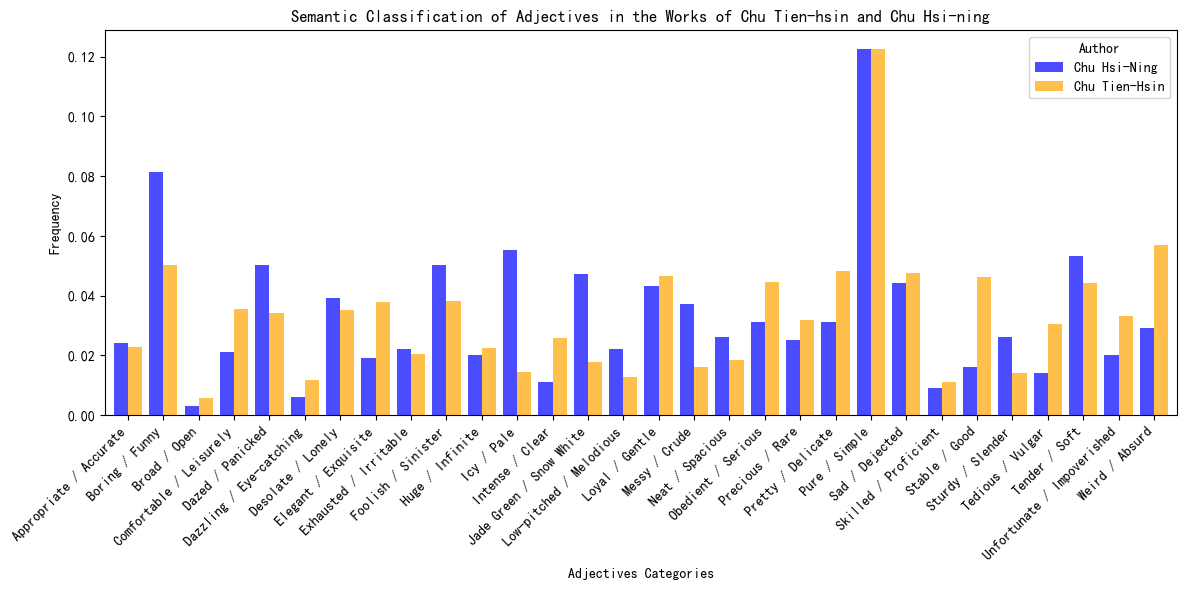

In [14]:
# Normalize the counts for each author
df_group['normalized_count'] = df_group.groupby('author')['count'].transform(lambda x: x / x.sum())

# Pivot the data for plotting
df_pivot = df_group.pivot(index='cluster_label', columns='author', values='normalized_count').fillna(0)

# Plot the bar chart
ax = df_pivot.plot(kind='bar', figsize=(12, 6), width=0.8, alpha=0.7, color=['blue', 'orange'])

# Customize the plot
plt.title('Semantic Classification of Adjectives in the Works of Chu Tien-hsin and Chu Hsi-ning')
plt.xlabel('Adjectives Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Author')
plt.tight_layout()

# Show the plot
plt.show()

# word emotion

In [92]:
df_emo_word = pd.read_csv('./ChineseEmoBank/CVAW_SD/CVAW_all_SD.csv', encoding='utf-8', sep='\t')
df_emo_word['Word'] = df_emo_word['Word'].apply(lambda x: chinese_converter.to_simplified(x))
emo_words = set(df_emo_word['Word'].unique().tolist())
df_emo_word

No.  Word  Valence_Mean  Arousal_Mean  Valence_SD  Arousal_SD
0        0  不可思议           5.4           7.2       1.020       1.327
1        1    不平           3.6           5.8       0.490       0.980
2        2    不甘           3.2           6.4       0.400       0.800
3        3    不安           3.8           5.4       0.400       0.490
4        4    不利           3.6           5.6       0.490       0.800
...    ...   ...           ...           ...         ...         ...
5507  5507    黏腻           2.7           5.8       0.908       1.255
5508  5508    艷丽           5.8           4.5       1.037       1.061
5509  5509    艳丽           5.8           4.5       1.037       1.061
5510  5510    苗条           6.7           3.8       1.095       1.255
5511  5511    修长           7.0           4.5       0.612       1.225

[5512 rows x 6 columns]

In [ ]:
tokenzier_name = 'COARSE_ELECTRA_SMALL_ZH'
tokenizer = hanlp.load(tokenzier_name)
tokenizer.dict_force = None
tokenizer.dict_combine = emo_words

In [152]:
# collect text
book_names = [f.encode('latin1').decode('utf-8') for f in os.listdir('./book')]

data = []
for book in book_names:
    if "朱天心" in book:
        year = int(book[-8:-4])
        # print(f"{book} {year}")
        book = book.encode('utf-8').decode('latin1')
        with open(f'./book/{book}', 'r', encoding='utf-8') as f:
                text_ = f.read()
                text_ = chinese_converter.to_simplified(text_)
                data.append(
                      {'author': 'Chu Tien-hsin', 'year': year, 'text': text_}
                )
    if "朱西甯" in book:
        year = int(book[-8:-4])
        book = book.encode('utf-8').decode('latin1')
        with open(f'./book/{book}', 'r', encoding='utf-8') as f:
                text_ = f.read()
                text_ = chinese_converter.to_simplified(text_)
                data.append(
                      {'author': 'Chu Hsi-ning', 'year': year, 'text': text_}
                )
    if "朱天文" in book:
       year = int(book[-8:-4])
       book = book.encode('utf-8').decode('latin1')
       with open(f'./book/{book}', 'r', encoding='utf-8') as f:
            text_ = f.read()
            text_ = chinese_converter.to_simplified(text_)
            data.append(
                  {'author': 'Chu Tien-wen', 'year': year, 'text': text_}
            )
df_book = pd.DataFrame(data)
df_book

author  year                                               text
0   Chu Tien-hsin  1996  ※我在圣马可广场，看到天使飞翔的特技，摩尔人跳舞，但没有妳，亲爱的，我孤独难耐。　　──I....
1    Chu Tien-wen  1990  世纪末的华丽\n\n\n\n\n\n　　这是台湾独有的城市天际线，米亚常常站在她的九楼阳台上...
2   Chu Tien-hsin  1995  匈牙利之水\n\n\n\n\n\n　　这是一个两杯老酒下肚、与我差不多年纪、样貌、职业的中年...
3   Chu Tien-hsin  1992  威尼斯之死\n\n\n\n\n\n　　嘿──别紧张，没有任何人死，没有任何事发生。\n\n\...
4    Chu Tien-wen  1989  尼罗河女儿\n\n\n\n\n\n　　距今遥远、遥远的三千年前，我被诅咒带回三千年前的古代世...
5    Chu Tien-wen  1989  带我去吧，月光\n\n\n\n\n\n　　1\n\n\n\n　　生生灭灭的每一天里，佳玮还是...
6   Chu Tien-hsin  1990  从前从前有个浦岛太郎\n\n\n在秋天，日夜等长的季节，他回到这个城市。\n\n用不着看第二...
7   Chu Tien-hsin  1991  想我眷村的兄弟们\n\n\n我恳请你，读这篇小说之前，做一些准备动作——不，不是冲上一杯滚烫...
8   Chu Tien-hsin  1992  我的朋友阿里萨\n\n\n去年秋天，当我的朋友阿里萨展开他为期不知会多久的自我放逐之旅的同时...
9   Chu Tien-hsin  1994  拉曼查志士\n\n\n\n\n\n　　严格的说，我开始有了为自己的死亡预作准备的念头，是从那...
10  Chu Tien-hsin  1977  　　■闲夢远　南国正芳春\n\n\n\n\n\n　　我和卡洛刚看完东南亚的「畸恋」，出得电影...
11   Chu Tien-wen  1988  柴师父\n\n\n\n\n\n　　很久很久以前，当时只有三十来岁的柴明仪曾经想过，年老的时候...
12  Chu Tien-hsin  1995  第凡内早餐\n\n\n\n\n\n　　职棒六年，职场九年的春天，我初初萌生想要买一颗钻石的念...
13   Chu Tien-wen  1992  红玫瑰呼叫你\n\n\n\n\n\n　　自从开窍以来便辛勤练歌以备随时可展喉一现的这个老男人...
14   Chu Tien-wen  1988  肉身菩萨\n\n\n\n\n\n　　今年的夏天像他十五岁那年的夏天。\n\n\n\n　　太阳...
15   Chu Tien-wen  1994  1\n\n2\n\n3\n\n4\n\n5\n\n6\n\n7\n\n8\n\n9\n\n1...
16  Chu Tien-hsin  1992  预知死亡纪事\n\n\n正西风落叶下长安，飞鸣镝。多少事，从来急，天地转，光阴迫。一万年太久...
17   Chu Hsi-ning  1963  余烬\n\n一个被反复说烂的故事，一直都没有说完就算了，居然没有谁再追问下去。\n\n当初那...
18   Chu Hsi-ning  1963  天上云层重重叠叠，红的要滴血，黄的又像生了病。还有一层低沉沉的灰云，一团又一团急急地飞跑，仿...
19   Chu Hsi-ning  1962  出殃\n\n“怎么回事儿——这是？出殃啦？”\n\n徐三走过头进院子，又迟迟疑疑来到二道门，...
20   Chu Hsi-ning  1957  \n刽子手\n\n傅二畜大赤着膊，单手叉腰，停在一家大字号的布庄门前石阶下，头上盘着大辫子，...
21   Chu Hsi-ning  1965  河搂着这个都市，圈这个都市成岛。\n河岸上这一式的碉堡，说不上像雨后乍晴的菌子那样盛;总也是...
22   Chu Hsi-ning  1958  捶踮\n\n祖母骑上牲口，又下来，说驴肚带松了，叫大伙计替她紧紧。\n\n父亲带着家人、伙计...
23   Chu Hsi-ning  1958  新坟\n\n秋风像把剪刀，剪得到处都是簌簌落叶。\n\n月亮底下，一排三座坟，靠西的一座还没...
24   Chu Hsi-ning  1963  春去也\n\n收蚕茧的节令又到了，那总是满地桃花落红烂醉的时候。\n缫丝房这一忙就要忙上一个...
25   Chu Hsi-ning  1962  天大约只有二更，村子早就沉进静静的黑梦。留下树梢上冷丝丝的风啸，和一两声闲散的狺狺犬吠。\n...
26   Chu Hsi-ning  1962  红灯笼\n\n花生收成一过，就是猎人脚獾的好时节了。\n\n老舅顶着寒霜，愣守两个通夜，连人...
27   Chu Hsi-ning  1959  贼\n\n我们的村子上——或者把附近的村落一起算在内，只姓沙的一家才有瓦房。大家提到沙家，不...
28   Chu Hsi-ning  1963  就不过是那么一面生满绿锈的铜镜，那样的斑斑驳驳，寒碜而衰老，被弃在遗忘的年岁里独自战索。\n...
29   Chu Hsi-ning  1961  铁浆\n\n人脸上都映着雪光，这场少见的大雪足足飞落了两夜零一天。打前一天过午起，三点二十分...
30   Chu Hsi-ning  1961  锁壳门\n\n一眼看不到边际的黄沙，天连着地，地连着天，寸草不生。覆盖在这巨大的旱湖上的云天...

Text(0.5, 1.0, "Distribution of Chu Tien-wen's Novels by Year")

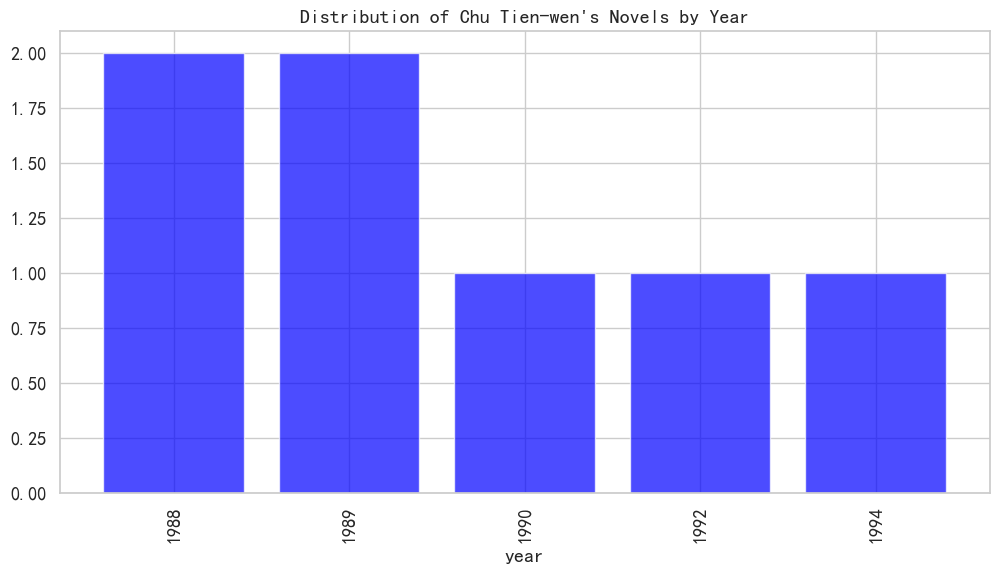

In [153]:
df_book[df_book['author'] == 'Chu Tien-wen'].year.value_counts().sort_index().plot(kind='bar', figsize=(12, 6), width=0.8, alpha=0.7, color=['blue'])
plt.title('Distribution of Chu Tien-wen\'s Novels by Year')

In [154]:
HanLP = hanlp.pipeline() \
    .append(hanlp.load('COARSE_ELECTRA_SMALL_ZH'), output_key='tok') \
    .append(hanlp.load('CTB9_POS_ELECTRA_SMALL'), output_key='pos') \
    # .append(hanlp.load('MSRA_NER_ELECTRA_SMALL_ZH'), output_key='ner', input_key='tok') \
    # .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')\
    # .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\
    # .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')

def extract_emo_words(text):
    
    res_ = HanLP(text)
    emo_words_in_text = {}

    for tok, pos in zip(res_['tok'], res_['pos']):
        if tok in emo_words:
            if pos not in emo_words_in_text:
                emo_words_in_text[pos] = []
            emo_words_in_text[pos].append(tok)
    
    return emo_words_in_text

df_book['emo_words'] = df_book['text'].apply(extract_emo_words)
df_emo_words_expanded = pd.json_normalize(df_book['emo_words'])
df_book = pd.concat([df_book, df_emo_words_expanded], axis=1)

In [158]:
df_book.head()

author  year                                               text  \
0  Chu Tien-hsin  1996  ※我在圣马可广场，看到天使飞翔的特技，摩尔人跳舞，但没有妳，亲爱的，我孤独难耐。　　──I....   
1   Chu Tien-wen  1990  世纪末的华丽\n\n\n\n\n\n　　这是台湾独有的城市天际线，米亚常常站在她的九楼阳台上...   
2  Chu Tien-hsin  1995  匈牙利之水\n\n\n\n\n\n　　这是一个两杯老酒下肚、与我差不多年纪、样貌、职业的中年...   
3  Chu Tien-hsin  1992  威尼斯之死\n\n\n\n\n\n　　嘿──别紧张，没有任何人死，没有任何事发生。\n\n\...   
4   Chu Tien-wen  1989  尼罗河女儿\n\n\n\n\n\n　　距今遥远、遥远的三千年前，我被诅咒带回三千年前的古代世...   

                                           emo_words  \
0  {'NN': ['天使', '阳光', '阻拦', '清新', '爱人', '死', '音乐...   
1  {'NN': ['华丽', '心情', '违建', '情人', '问题', '天衣无缝', ...   
2  {'AD': ['自然', '正', '不肯', '正', '偷偷', '真正', '不慎'...   
3  {'NN': ['死', '奖', '奖金', '流浪', '癡癡', '成长', '绝望'...   
4  {'NN': ['诅咒', '情人', '东西', '自由', '天真', '自然', '癌...   

                                                  NN  \
0  [天使, 阳光, 阻拦, 清新, 爱人, 死, 音乐, 机会, 眼泪, 朋友, 兴趣, 现实...   
1  [华丽, 心情, 违建, 情人, 问题, 天衣无缝, 负荷, 东西, 无形, 经验, 纾解,...   
2  [朋友, 流行, 酒鬼, 礼貌, 期待, 快乐, 好闻, 流行, 友谊, 心情, 朋友, 拥...   
3  [死, 奖, 奖金, 流浪, 癡癡, 成长, 绝望, 混乱, 奖金, 朋友, 废墟, 火灾,...   
4  [诅咒, 情人, 东西, 自由, 天真, 自然, 癌症, 痛, 棒, 毒品, 死亡, 魅力,...   

                                                  VE  \
0  [没有, 没有, 没有, 毫无, 没有, 没有, 毫无, 没有, 没有, 没有, 毫无, 没...   
1                   [没有, 没有, 毫无, 没有, 没有, 没有, 没有, 没有]   
2  [没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没...   
3  [没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没...   
4                               [没有, 没有, 没有, 没有, 没有]   

                                                  JJ  \
0  [亲爱的, 干净, 好, 阳光, 好, 好, 巨大, 真正, 正确, 有毒, 好, 好, 脏...   
1  [干燥, 缤纷, 冷, 浪漫, 善良, 不规则, 温柔, 堕落, 清纯, 殖民地, 僵硬, ...   
2  [违建, 凉爽, 廉价, 廉价, 好, 粉嫩, 干, 认真, 大胆, 特别, 特别, 特殊,...   
3  [真正, 真正, 懒, 停电, 惊悚, 知名, 好, 重要, 正统, 老实, 积极, 美丽,...   
4     [孤独, 烂, 流行, 烂, 亲爱的, 亲爱的, 透明, 荒芜, 苦, 违章, 颓废, 好]   

                                                  AD  \
0  [孤独, 好, 格外, 尚未, 特别, 特别, 绝不, 自然, 好, 尚未, 轻松, 故意,...   
1  [当然, 的确, 突然, 过份, 无法, 不会, 好, 冷, 整齐, 好, 绝对, 不能, ...   
2  [自然, 正, 不肯, 正, 偷偷, 真正, 不慎, 努力, 当然, 好久, 没有, 不准,...   
3  [真正, 真正, 无暇, 居然, 狠心, 大声, 正, 清楚, 无法, 实在, 独自, 免费...   
4  [突然, 不要, 正式, 乱, 干, 嘟嘟, 不会, 不准, 不会, 绝对, 不能, 不要,...   

                                                  VV  \
0  [想, 愿意, 游荡, 错过, 喜欢, 确定, 笑, 知道, 玩, 疯, 知道, 伤心, 超...   
1  [独有, 解决, 相信, 依赖, 淹没, 依赖, 想, 确信, 解决, 应付, 解决, 解决...   
2  [爱, 抱歉, 鲁莽, 明白, 协助, 敦促, 想, 苦恼, 放弃, 不顾, 知道, 想, ...   
3  [死, 参加, 践踏, 践踏, 流浪, 奋力, 放心, 徘徊, 分心, 同情, 举行, 迷恋...   
4  [爱上, 想, 崇拜, 崇拜, 喜欢, 知道, 保证, 叛逆, 流失, 超越, 迷失, 成为...   

                                                  VA  ...  \
0  [强烈, 奇怪, 单纯, 天真, 傻, 惨, 温和, 好, 好玩, 好玩, 邋遢, 好奇, ...  ...   
1  [迟钝, 锐利, 准确, 透明, 漫长, 毛躁, 柔软, 清洁, 快乐, 邪恶, 便宜, 潮...  ...   
2  [热心, 良好, 可怕, 单纯, 狂暴, 苗条, 辛苦, 奇怪, 好, 奇怪, 冷冷, 冷冷...  ...   
3  [紧张, 冗长, 美丽, 高兴, 便宜, 好, 错, 疯狂, 好, 细腻, 温柔, 天真, ...  ...   
4  [对, 高雅, 洁净, 毒, 帅, 伟大, 可爱, 奇怪, 对, 好, 熟练, 惨, 变态,...  ...   

                             NR    SP        PN   NOI    CC    M   IJ   LC  \
0  [冷, 鲁莽, 耶, 真理, 猪哥, 佳, 奇怪, 丑]  [罢了]       NaN   NaN   NaN  NaN  NaN  NaN   
1                           NaN   NaN  [自我, 自我]   NaN   NaN  NaN  NaN  NaN   
2                    [鲁莽, 仇, 贱]   [耶]       NaN  [不会]  [不如]  NaN  NaN  NaN   
3                          [文雅]   NaN       NaN   NaN   NaN  [对]  NaN  NaN   
4       [许可, 奇怪, 逊, 嘟嘟, 嘟嘟, 嘟嘟]   NaN      [自我]   NaN   NaN  NaN  NaN  NaN   

    BA   PU  
0  NaN  NaN  
1  NaN  NaN  
2  NaN  NaN  
3  NaN  NaN  
4  NaN  NaN  

[5 rows x 23 columns]

In [164]:
df_book[df_book['author'] == 'Chu Tien-wen']['text'].apply(lambda x: len(x)).sum()

177770

In [165]:
pos_list = df_book.columns.tolist()[4:23]

def compute_emo_word_valence(emo_word_list):
    valence_mean = 0
    if type(emo_word_list) == float:
        return 0
    else:
        for word in emo_word_list:
            if word in df_emo_word['Word'].values:
                valence_mean += df_emo_word[df_emo_word['Word'] == word]['Valence_Mean'].values[0]
        return valence_mean / len(emo_word_list)


def compute_emo_word_arousal(emo_word_list):
    arousal_mean = 0
    if type(emo_word_list) == float:
        return 0
    else:
        for word in emo_word_list:
            if word in df_emo_word['Word'].values:
                arousal_mean += df_emo_word[df_emo_word['Word'] == word]['Arousal_Mean'].values[0]
        return arousal_mean / len(emo_word_list)


for pos in pos_list:
    df_book[f"{pos}_valence_mean"] = df_book[f"{pos}"].apply(lambda x: compute_emo_word_valence(x))
    df_book[f"{pos}_arousal_mean"] = df_book[f"{pos}"].apply(lambda x: compute_emo_word_arousal(x))
df_book.head()

author  year                                               text  \
0  Chu Tien-hsin  1996  ※我在圣马可广场，看到天使飞翔的特技，摩尔人跳舞，但没有妳，亲爱的，我孤独难耐。　　──I....   
1   Chu Tien-wen  1990  世纪末的华丽\n\n\n\n\n\n　　这是台湾独有的城市天际线，米亚常常站在她的九楼阳台上...   
2  Chu Tien-hsin  1995  匈牙利之水\n\n\n\n\n\n　　这是一个两杯老酒下肚、与我差不多年纪、样貌、职业的中年...   
3  Chu Tien-hsin  1992  威尼斯之死\n\n\n\n\n\n　　嘿──别紧张，没有任何人死，没有任何事发生。\n\n\...   
4   Chu Tien-wen  1989  尼罗河女儿\n\n\n\n\n\n　　距今遥远、遥远的三千年前，我被诅咒带回三千年前的古代世...   

                                           emo_words  \
0  {'NN': ['天使', '阳光', '阻拦', '清新', '爱人', '死', '音乐...   
1  {'NN': ['华丽', '心情', '违建', '情人', '问题', '天衣无缝', ...   
2  {'AD': ['自然', '正', '不肯', '正', '偷偷', '真正', '不慎'...   
3  {'NN': ['死', '奖', '奖金', '流浪', '癡癡', '成长', '绝望'...   
4  {'NN': ['诅咒', '情人', '东西', '自由', '天真', '自然', '癌...   

                                                  NN  \
0  [天使, 阳光, 阻拦, 清新, 爱人, 死, 音乐, 机会, 眼泪, 朋友, 兴趣, 现实...   
1  [华丽, 心情, 违建, 情人, 问题, 天衣无缝, 负荷, 东西, 无形, 经验, 纾解,...   
2  [朋友, 流行, 酒鬼, 礼貌, 期待, 快乐, 好闻, 流行, 友谊, 心情, 朋友, 拥...   
3  [死, 奖, 奖金, 流浪, 癡癡, 成长, 绝望, 混乱, 奖金, 朋友, 废墟, 火灾,...   
4  [诅咒, 情人, 东西, 自由, 天真, 自然, 癌症, 痛, 棒, 毒品, 死亡, 魅力,...   

                                                  VE  \
0  [没有, 没有, 没有, 毫无, 没有, 没有, 毫无, 没有, 没有, 没有, 毫无, 没...   
1                   [没有, 没有, 毫无, 没有, 没有, 没有, 没有, 没有]   
2  [没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没...   
3  [没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没有, 没...   
4                               [没有, 没有, 没有, 没有, 没有]   

                                                  JJ  \
0  [亲爱的, 干净, 好, 阳光, 好, 好, 巨大, 真正, 正确, 有毒, 好, 好, 脏...   
1  [干燥, 缤纷, 冷, 浪漫, 善良, 不规则, 温柔, 堕落, 清纯, 殖民地, 僵硬, ...   
2  [违建, 凉爽, 廉价, 廉价, 好, 粉嫩, 干, 认真, 大胆, 特别, 特别, 特殊,...   
3  [真正, 真正, 懒, 停电, 惊悚, 知名, 好, 重要, 正统, 老实, 积极, 美丽,...   
4     [孤独, 烂, 流行, 烂, 亲爱的, 亲爱的, 透明, 荒芜, 苦, 违章, 颓废, 好]   

                                                  AD  \
0  [孤独, 好, 格外, 尚未, 特别, 特别, 绝不, 自然, 好, 尚未, 轻松, 故意,...   
1  [当然, 的确, 突然, 过份, 无法, 不会, 好, 冷, 整齐, 好, 绝对, 不能, ...   
2  [自然, 正, 不肯, 正, 偷偷, 真正, 不慎, 努力, 当然, 好久, 没有, 不准,...   
3  [真正, 真正, 无暇, 居然, 狠心, 大声, 正, 清楚, 无法, 实在, 独自, 免费...   
4  [突然, 不要, 正式, 乱, 干, 嘟嘟, 不会, 不准, 不会, 绝对, 不能, 不要,...   

                                                  VV  \
0  [想, 愿意, 游荡, 错过, 喜欢, 确定, 笑, 知道, 玩, 疯, 知道, 伤心, 超...   
1  [独有, 解决, 相信, 依赖, 淹没, 依赖, 想, 确信, 解决, 应付, 解决, 解决...   
2  [爱, 抱歉, 鲁莽, 明白, 协助, 敦促, 想, 苦恼, 放弃, 不顾, 知道, 想, ...   
3  [死, 参加, 践踏, 践踏, 流浪, 奋力, 放心, 徘徊, 分心, 同情, 举行, 迷恋...   
4  [爱上, 想, 崇拜, 崇拜, 喜欢, 知道, 保证, 叛逆, 流失, 超越, 迷失, 成为...   

                                                  VA  ... M_valence_mean  \
0  [强烈, 奇怪, 单纯, 天真, 傻, 惨, 温和, 好, 好玩, 好玩, 邋遢, 好奇, ...  ...            0.0   
1  [迟钝, 锐利, 准确, 透明, 漫长, 毛躁, 柔软, 清洁, 快乐, 邪恶, 便宜, 潮...  ...            0.0   
2  [热心, 良好, 可怕, 单纯, 狂暴, 苗条, 辛苦, 奇怪, 好, 奇怪, 冷冷, 冷冷...  ...            0.0   
3  [紧张, 冗长, 美丽, 高兴, 便宜, 好, 错, 疯狂, 好, 细腻, 温柔, 天真, ...  ...            6.4   
4  [对, 高雅, 洁净, 毒, 帅, 伟大, 可爱, 奇怪, 对, 好, 熟练, 惨, 变态,...  ...            0.0   

  M_arousal_mean IJ_valence_mean IJ_arousal_mean LC_valence_mean  \
0            0.0             0.0             0.0             0.0   
1            0.0             0.0             0.0             0.0   
2            0.0             0.0             0.0             0.0   
3            4.8             0.0             0.0             0.0   
4            0.0             0.0             0.0             0.0   

  LC_arousal_mean BA_valence_mean BA_arousal_mean PU_valence_mean  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

  PU_arousal_mean  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 61 columns]

In [169]:
import pandas as pd
import numpy as np
import plotly.express as px


# Create an interactive scatter plot
fig = px.scatter(
    df_book,
    x='VA_valence_mean',
    y='VA_arousal_mean',
    color='author',
    hover_data={'author': True, 'year': True, 'text': False},
    text='year',
    title='Valence-Arousal Score of Books by Author',
    labels={'x': 'Valence', 'y': 'Arousal'}
)

# Customize the layout
fig.update_traces(marker=dict(size=10, opacity=0.7), textposition='top center')
fig.update_layout(
    xaxis=dict(range=[0, 10]),
    yaxis=dict(range=[0, 10]),
    legend_title_text='Author',
    autosize=False,
    width=600,
    height=600
)

# Show the plot
fig.show()

# verb analysis with dependency parsing

In [15]:
MALE_SEED = ['哥', '弟', '父', '爸', '爷', '伯', '叔', '舅', '公', '男', '郎', '兄']
FEMALE_SEED = ['姐', '妹', '母', '妈', '奶', '婆', '嬷', '女', '娘',  '姨', '嫂', '姊']

MALE_WORDS = ["他", "他们", "男士", "男孩", "男子", "男性", "先生", "男人", "爸爸", "父亲", "姥爷", "儿子", "男友",\
    "叔叔", "哥哥", "弟弟", "爷爷", "外公", "公公", "舅舅", "伯伯", "大哥", "小弟", "男神", "男生",\
    "阿公", "爸比", "父親", "祖父", "外祖父", "堂哥", "堂弟", "表哥", "表弟", '大哥', '阿公', '兄弟']
FEMALE_WORDS = ["她", "她们", "女士", "女孩", "女子", "女性", "小姐", "女人", "妈妈", "母亲", "姥姥", "女儿", "女友",\
    "阿姨", "姐姐", "妹妹", "奶奶", "外婆", "婆婆", "舅妈", "大姐", "小妹", "女神", "女生",\
    "阿嬷", "妈咪", "母親", "祖母", "外祖母", "堂姐", "堂妹", "表姐", "表妹", '小姐', '太太', '阿姨', '姊妹']

In [16]:
# collect text
book_names = [f.encode('latin1').decode('utf-8') for f in os.listdir('./book')]
text = ""
for book in book_names:
    if "朱天心" in book:
        book = book.encode('utf-8').decode('latin1')
        with open(f'./book/{book}', 'r', encoding='utf-8') as f:
                text_ = f.read()
                text_ = chinese_converter.to_simplified(text_)
                text += text_ + "\n"

In [17]:
# clean the text
text_chunks = text.replace("\u3000", "").split("\n")
text_chunks = [chunk for chunk in text_chunks if chunk.strip()]
text_chunks = [chunk for text_chunk in text_chunks for chunk in hanlp.utils.rules.split_sentence(text_chunk)]
text_chunks = [chunk for chunk in text_chunks if re.search(r'[\u4e00-\u9fff]', chunk)]

ways of finding person entities (pronoun, person name, etc.) for better dependency parsing analysis (still exploring)

In [18]:
# explan gender words
male_counter = Counter()
female_counter = Counter()

pattern = re.compile(r"[一-龥]{1,4}")

words = pattern.findall("。".join(text_chunks))

for word in words:
    if any(p in word for p in MALE_SEED):
        male_counter[word] += 1
    if any(p in word for p in FEMALE_SEED):
        female_counter[word] += 1

# 获取频率较高的称谓词
top_male = [w for w, c in male_counter.most_common(50) if len(w) <= 3]
top_female = [w for w, c in female_counter.most_common(50) if len(w) <= 3]

print(top_male)
print(top_female)

['男孩', '爷爷说', '哥', '爸爸', '男人', '公园', '爸', '男孩子', '个男孩', '哥哥', '教父', '舅妈', '父亲', '公园号', '父', '国父', '天父', '伯', '外公', '公室', '男友', '少爷', '我舅妈', '男子', '阿义哥', '弟', '父字', '宝哥']
['女孩', '妈妈', '母', '妹妹', '的女孩', '女', '婆', '的女人', '舅妈', '妈', '妹', '母亲', '女人', '姊姊', '姊', '的女儿', '我舅妈', '我老婆', '小姐', '妹们', '是女', '妹妹说']


In [151]:
# expand using information from constituents and NER
HanLP = hanlp.pipeline() \
    .append(hanlp.load('COARSE_ELECTRA_SMALL_ZH'), output_key='tok') \
    .append(hanlp.load('CTB9_POS_ELECTRA_SMALL'), output_key='pos') \
    .append(hanlp.load('MSRA_NER_ELECTRA_SMALL_ZH'), output_key='ner', input_key='tok') \
    .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')\
    # .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\
    # .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')


all_records = []
for text_sample in tqdm(text_chunks):
    if "魏哥哥" in text_sample:
        HanLP(text_sample).pretty_print()
        res = HanLP(text_sample)
        # print(res)
        # print(res['con'])
        break

  0%|          | 0/5317 [00:00<?, ?it/s]     

 81%|████████▏ | 4325/5317 [00:00<00:00, 23211.79it/s]


customize the tokenzier with new words

In [19]:
MALE_WORDS_EXPANDED = [
    '卢伯伯', '男孩子', '外公', '我大舅', '兄弟们', '先生', '男朋友', '教父', 
    '男人', '先生们', '乔和魏哥哥', '我外公'
]

FEMALE_WORDS_EXPANDED = ['我老婆', '孟姊姊', '女孩子', '我外婆', '女孩儿',
                         '女人', '女', '小女', '妈妈', '姊姊', '妹妹', '阿芳嫂', '女学生']

In [20]:
MALE_WORDS = set(MALE_WORDS).union(MALE_WORDS_EXPANDED)
FEMALE_WORDS = set(FEMALE_WORDS).union(FEMALE_WORDS_EXPANDED)
CUSTOMIZED_WORDS = MALE_WORDS.union(FEMALE_WORDS)

tokenzier_name = 'COARSE_ELECTRA_SMALL_ZH'
tokenizer = hanlp.load(tokenzier_name)
tokenizer.dict_force = None
tokenizer.dict_combine = CUSTOMIZED_WORDS

compute idf with the tokenizer

In [21]:
# compute idf
doc_freq = defaultdict(int)
total_docs = len(text_chunks)
for doc in tqdm(text_chunks, desc="Tokenizing documents"):
    tokens = set(tokenizer(doc))  # use a set to count each token once per document
    for token in tokens:
        doc_freq[token] += 1
idf = {token: math.log((total_docs + 1) / (freq + 1)) + 1 for token, freq in doc_freq.items()}
with open('token_idf.txt', 'w', encoding='utf-8') as f:
    for token, score in idf.items():
        f.write(f"{token}\t{score}\n")

Tokenizing documents:  31%|███       | 1641/5317 [00:22<00:51, 71.98it/s]


KeyboardInterrupt: 

perform dependency parsing

In [153]:
HanLP = hanlp.pipeline() \
    .append(tokenizer, output_key='tok') \
    .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\

def extract_verbs(toks, dep):
    records = []
    for i, tok in enumerate(toks):
        if tok in MALE_WORDS:
            records.append((tok, toks[dep[i][0]-1], dep[i][1], 'male'))
        elif tok in FEMALE_WORDS:
            records.append((tok, toks[dep[i][0]-1], dep[i][1], 'female'))
    return records

all_records = []
for text_sample in tqdm(text_chunks, desc="Processing text with HanLP"):
    res = HanLP(text_sample)
    all_records.extend(extract_verbs(res['tok'], res['dep']))

df_gender = pd.DataFrame(all_records, columns=['gender_word', 'verb', 'relation', 'gender'])
df_gender.to_csv('gender_coarse.csv')

Processing text with HanLP: 100%|██████████| 5317/5317 [05:53<00:00, 15.05it/s]


In [ ]:
df_gender = pd.read_csv('gender_coarse.csv').drop(columns=['Unnamed: 0'])
idf_df = pd.read_csv('token_idf.txt', sep='\t', header=None, names=['token', 'idf'], encoding='utf-8')
idf = idf_df.set_index('token')['idf'].to_dict()

In [23]:
def ranking(group):
    verb_counts = group['verb'].value_counts()
    scores = {verb: count * idf.get(verb, 1) for verb, count in verb_counts.items()}
    ranked_verbs = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame({'verb_ranked': [verb for verb, score in ranked_verbs],
                        'count': [verb_counts[verb] for verb, score in ranked_verbs],
                        'idf': [idf.get(verb, 1) for verb, score in ranked_verbs]})

df_group = df_gender.groupby(['gender', 'relation']).apply(ranking)

/tmp/ipykernel_2743313/1916594008.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_group = df_gender.groupby(['gender', 'relation']).apply(ranking)


In [24]:
df_group

verb_ranked  count       idf
gender relation                               
female amod     0          同业      4  6.939795
                1          明星      2  7.632942
                2         漫画家      1  8.885705
                3          机车      1  8.885705
                4          同胞      1  8.192558
...                       ...    ...       ...
male   xsubj    4          回答      1  6.534330
                5           拍      1  6.443358
                6          没有      1  4.189781
                7           做      1  4.073521
                8           看      1  3.315454

[2371 rows x 3 columns]

In [25]:
gender_relation_pair = ('male', 'nsubj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)]
verbs

verb_ranked  count       idf
1            告诉     17  5.004142
10           以为      9  4.993885
11           一样     11  4.081684
12           记得      9  4.953880
14           知道     11  3.958452
..          ...    ...       ...
701          想起      1  5.404465
703          奇怪      1  5.274787
705          眼睛      1  5.196826
706          有些      1  5.196826
711          那个      1  4.799729

[509 rows x 3 columns]

In [31]:
gender_relation_pair = ('male', 'nsubj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)
# Add a new column to translate the verb_ranked to English
verbs['verb_ranked'].tolist()
translations = {
    '告诉': 'tell',
    '以为': 'think',
    '一样': 'same',
    '记得': 'remember',
    '知道': 'know',
    '熟悉': 'familiar',
    '认为': 'believe',
    '回来': 'return',
    '看到': 'see',
    '相信': 'trust',
    '解释': 'explain',
    '喜欢': 'like',
    '发现': 'discover',
    '觉得': 'feel',
    '变得': 'become',
    '打算': 'plan',
    '说话': 'speak',
    '清楚': 'clear',
    '居住': 'reside',
    '思索': 'ponder',
    '离去': 'leave',
    '找到': 'find',
    '注意': 'notice',
    '因势利导': 'adapt to circumstances',
    '决斗': 'duel',
    '充满': 'filled with',
    '身处': 'situated',
    '有理': 'reasonable',
    '愿意': 'willing',
    '没有': 'not have'
}

verbs['verb_ranked_english'] = verbs['verb_ranked'].map(translations)
verbs

verb_ranked  count       idf     verb_ranked_english
1           告诉     17  5.004142                    tell
10          以为      9  4.993885                   think
11          一样     11  4.081684                    same
12          记得      9  4.953880                remember
14          知道     11  3.958452                    know
16          熟悉      6  6.246648                familiar
18          认为      6  6.082345                 believe
19          回来      6  5.841183                  return
20          看到      7  4.774832                     see
21          相信      6  5.359345                   trust
22          解释      5  6.211557                 explain
24          喜欢      7  4.374846                    like
29          发现      6  4.878372                discover
36          觉得      6  4.391467                    feel
38          变得      4  6.177655                  become
41          打算      4  5.772190                    plan
42          说话      4  5.647027                   speak
45          清楚      4  5.518410                   clear
46          居住      3  7.276267                  reside
47          思索      3  7.013903                  ponder
49          离去      3  6.806264                   leave
52          找到      3  6.487810                    find
53          注意      3  6.487810                  notice
60        因势利导      2  8.885705  adapt to circumstances
61          决斗      2  8.885705                    duel
62          充满      3  5.889973             filled with
66          身处      2  8.480240                situated
67          有理      2  8.480240              reasonable
68          愿意      3  5.647027                 willing
69          没有      4  4.189781                not have

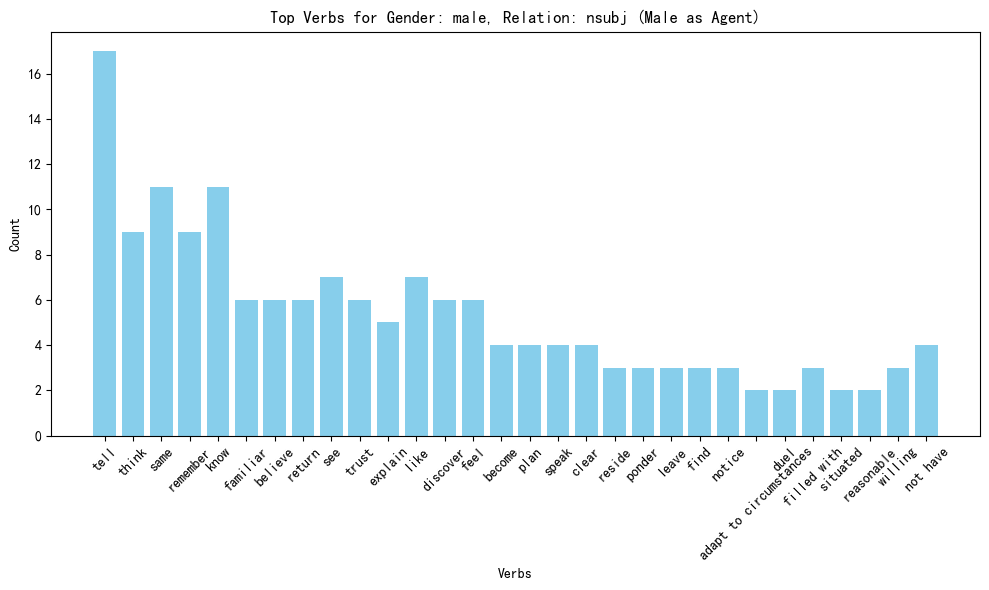

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked_english'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (Male as Agent)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
gender_relation_pair = ('female', 'nsubj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)
verbs['verb_ranked'].tolist()
translations = {
    '喜欢': 'like',
    '告诉': 'tell',
    '觉得': 'feel',
    '一样': 'same',
    '认为': 'believe',
    '认识': 'know',
    '回来': 'return',
    '打扮': 'dress up',
    '坚持': 'persist',
    '漂亮': 'beautiful',
    '古典': 'classical',
    '结交': 'make friends',
    '娶回': 'marry back',
    '说话': 'speak',
    '没有': 'not have',
    '当做': 'regard as',
    '赶来': 'hurry over',
    '浇水': 'water',
    '感觉': 'feel',
    '记下': 'note down',
    '当作': 'treat as',
    '捡拾': 'pick up',
    '不得了': 'terrific',
    '记得': 'remember',
    '发现': 'discover',
    '目睹': 'witness',
    '看到': 'see',
    '出国': 'go abroad',
    '考虑': 'consider',
    '拥有': 'possess'
}
verbs['verb_ranked_english'] = verbs['verb_ranked'].map(translations)
verbs

verb_ranked  count       idf verb_ranked_english
1           喜欢     12  4.374846                like
10          告诉      7  5.004142                tell
15          觉得      7  4.391467                feel
21          一样      6  4.081684                same
22          认为      4  6.082345             believe
24          认识      4  5.915291                know
25          回来      4  5.841183              return
29          打扮      3  7.180957            dress up
31          坚持      3  6.939795             persist
36          漂亮      3  6.052492           beautiful
39          古典      2  8.480240           classical
40          结交      2  8.480240        make friends
41          娶回      2  8.480240          marry back
42          说话      3  5.647027               speak
43          没有      4  4.189781            not have
45          当做      2  8.192558           regard as
46          赶来      2  8.192558          hurry over
47          浇水      2  8.192558               water
52          感觉      3  5.274787                feel
54          记下      2  7.632942           note down
55          当作      2  7.632942            treat as
56          捡拾      2  7.632942             pick up
58         不得了      2  7.499411            terrific
59          记得      3  4.953880            remember
61          发现      3  4.878372            discover
65          目睹      2  7.180957             witness
66          看到      3  4.774832                 see
71          出国      2  6.806264           go abroad
72          考虑      2  6.806264            consider
75          拥有      2  6.583120             possess

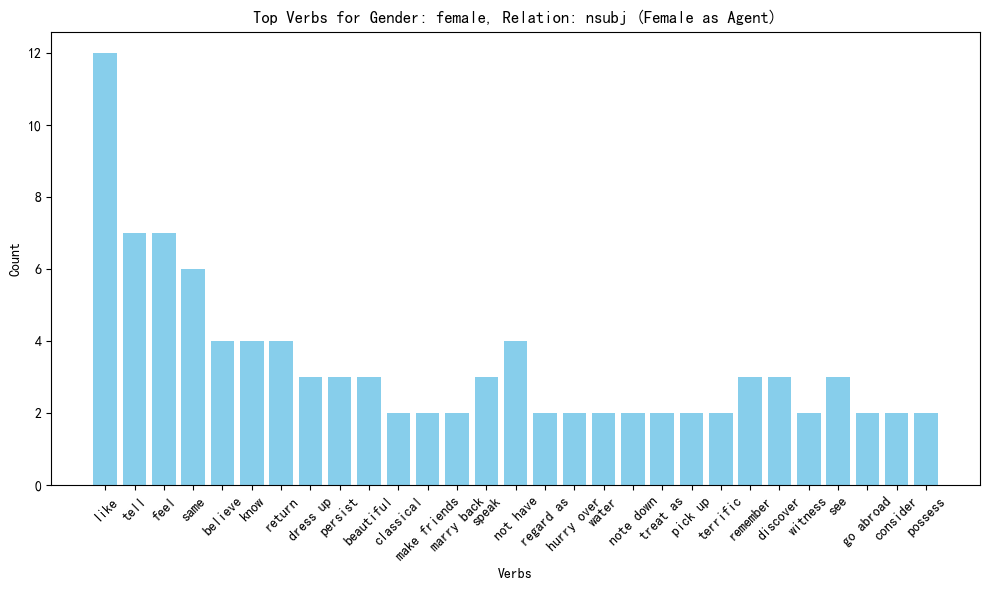

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked_english'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (Female as Agent)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
gender_relation_pair = ('male', 'dobj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)
verbs['verb_ranked'].tolist()
# Add a new column to translate the verb_ranked to English

translations.update({
    '告诉': 'tell',
    '认识': 'know',
    '提醒': 'remind',
    '监视': 'monitor',
    '喜欢': 'like',
    '瞧不起': 'despise',
    '冲犯': 'offend',
    '弃绝': 'reject',
    '叫出': 'call out',
    '质问': 'question',
    '带给': 'bring to',
    '打断': 'interrupt',
    '卖给': 'sell to',
    '抚慰': 'comfort',
    '崇拜': 'worship',
    '称呼': 'address',
    '送给': 'give to',
    '使得': 'cause',
    '看到': 'see',
    '同情': 'sympathize',
    '要是': 'if',
    '想到': 'think of',
    '回答': 'answer',
    '见到': 'meet',
    '想起': 'recall',
    '开始': 'start',
    '挥别': 'wave goodbye',
    '碰上': 'encounter',
    '顾左右而言': 'evade the question',
    '凌辱': 'humiliate'
})
verbs['verb_ranked_english'] = verbs['verb_ranked'].map(translations)
verbs

verb_ranked  count       idf verb_ranked_english
4           告诉     11  5.004142                tell
12          认识      6  5.915291                know
13          提醒      5  6.583120              remind
14          监视      4  7.787093             monitor
22          喜欢      4  4.374846                like
23         瞧不起      2  8.480240             despise
24          冲犯      2  8.480240              offend
25          弃绝      2  8.480240              reject
26          叫出      2  8.192558            call out
27          质问      2  7.969415            question
28          带给      2  7.787093            bring to
29          打断      2  7.787093           interrupt
30          卖给      2  7.632942             sell to
31          抚慰      2  7.632942             comfort
32          崇拜      2  7.632942             worship
34          称呼      2  7.499411             address
37          送给      2  7.276267             give to
38          使得      2  7.276267               cause
40          看到      3  4.774832                 see
41          同情      2  6.870802          sympathize
42          要是      2  6.806264                  if
43          想到      3  4.460859            think of
45          回答      2  6.534330              answer
46          见到      2  6.534330                meet
49          想起      2  5.404465              recall
50          开始      2  5.160012               start
53          挥别      1  8.885705        wave goodbye
54          碰上      1  8.885705           encounter
55       顾左右而言      1  8.885705  evade the question
56          凌辱      1  8.885705           humiliate

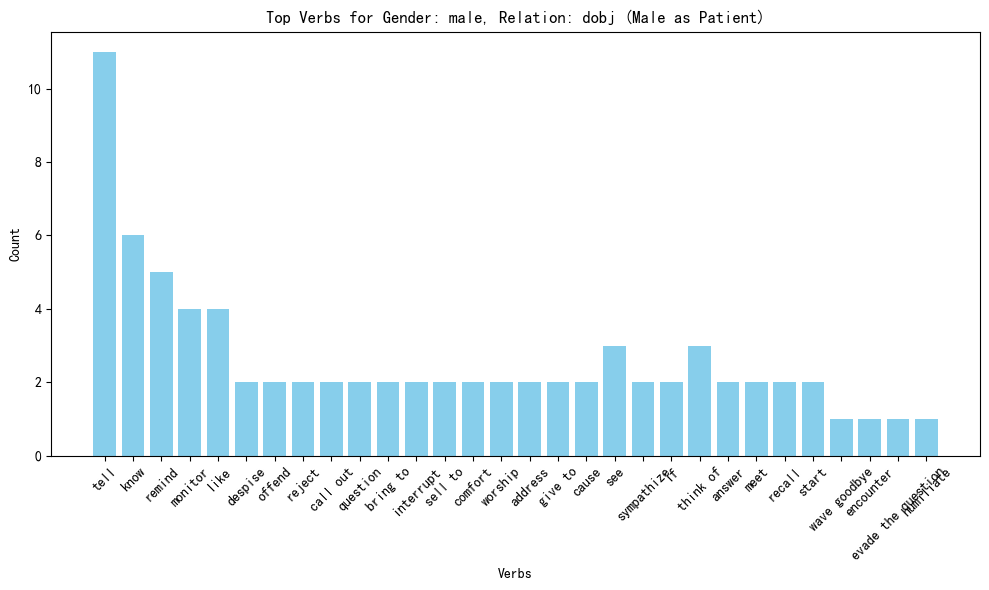

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked_english'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (Male as Patient)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
gender_relation_pair = ('female', 'dobj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)
translations = {
    '告诉': 'tell',
    '想起': 'recall',
    '送给': 'give to',
    '喜欢': 'like',
    '阻止': 'prevent',
    '看到': 'see',
    '仰望': 'look up to',
    '接纳': 'accept',
    '寄给': 'send to',
    '像是': 'seem like',
    '想到': 'think of',
    '想念': 'miss',
    '认识': 'know',
    '看看': 'take a look',
    '发现': 'discover',
    '强过': 'surpass',
    '由着': 'let it be',
    '取笑': 'mock',
    '看透': 'see through',
    '界定': 'define',
    '访谈': 'interview',
    '护卫': 'guard',
    '高拉': 'pull up',
    '欺负': 'bully',
    '怨怪': 'blame',
    '侵扰': 'harass',
    '想不起': 'cannot recall',
    '善待': 'treat kindly',
    '租给': 'rent to',
    '亲爱过': 'have loved'
}
verbs['verb_ranked_english'] = verbs['verb_ranked'].map(translations)
verbs

verb_ranked  count       idf verb_ranked_english
0           告诉     14  5.004142                tell
5           想起      9  5.404465              recall
8           送给      5  7.276267             give to
10          喜欢      7  4.374846                like
16          阻止      3  7.013903             prevent
19          看到      4  4.774832                 see
24          仰望      2  8.192558          look up to
25          接纳      2  7.969415              accept
27          寄给      2  7.969415             send to
35          像是      2  6.806264           seem like
37          想到      3  4.460859            think of
38          想念      2  6.359977                miss
41          认识      2  5.915291                know
42          看看      2  5.627609         take a look
46          发现      2  4.878372            discover
49          强过      1  8.885705             surpass
50          由着      1  8.885705           let it be
51          取笑      1  8.885705                mock
52          看透      1  8.885705         see through
53          界定      1  8.885705              define
54          访谈      1  8.885705           interview
55          护卫      1  8.885705               guard
56          高拉      1  8.885705             pull up
59          欺负      1  8.885705               bully
60          怨怪      1  8.885705               blame
61          侵扰      1  8.885705              harass
62         想不起      1  8.885705       cannot recall
63          善待      1  8.885705        treat kindly
64          租给      1  8.885705             rent to
65         亲爱过      1  8.885705          have loved

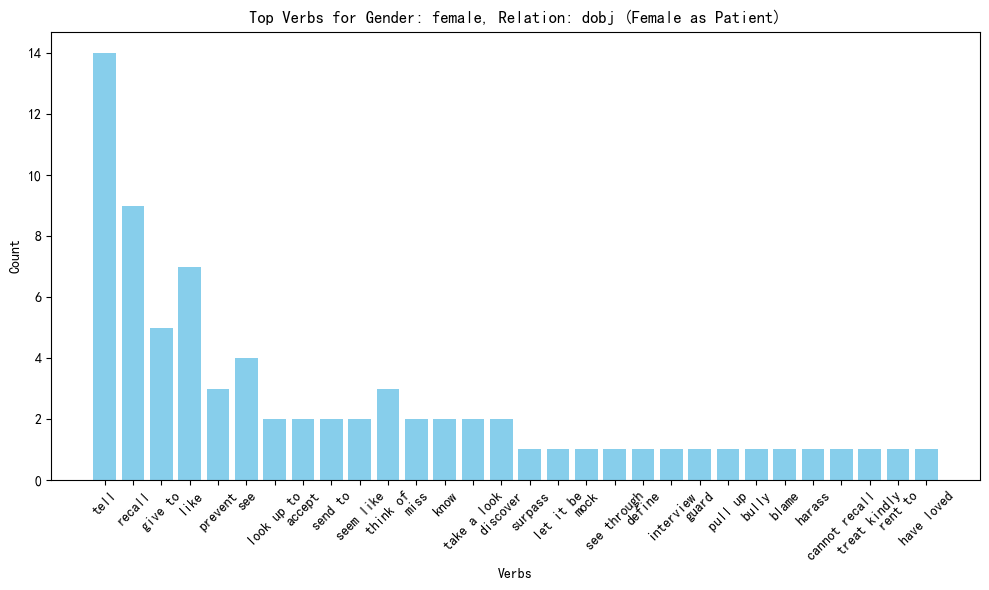

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked_english'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (Female as Patient)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()